# Introduction<br>
$\bullet$ In this project i will analyze different features from a the Flight Passenger Satisfaction database.<br>
$\bullet$ I will build a model that will allow me to determine the satisfaction of a given passenger.

## 1) Importing and understanding the data

In [375]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [376]:
df = pd.read_csv(r'C:\Users\Leead\Desktop\test.csv')
# you can see here the head of the database:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

#### Feature Description

1) id : id number to each passenger. <br>
2) Gender: Gender of the passengers (Female, Male)<br>
3) Customer Type: The customer type (Loyal customer, disloyal customer)<br>
4) Age: The age of the passengers<br>
5) Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)<br>
6) Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)<br>
7) Flight distance: The flight distance of this journey<br>
8) Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)<br>
9) Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient<br>
10) Ease of Online booking: Satisfaction level of online booking<br>
11) Gate location: Satisfaction level of Gate location<br>
12) Food and drink: Satisfaction level of Food and drink<br>
13) Online boarding: Satisfaction level of online boarding<br>
14) Seat comfort: Satisfaction level of Seat comfort<br>
15) Inflight entertainment: Satisfaction level of inflight entertainment<br>
16) On-board service: Satisfaction level of On-board service<br>
17) Leg room service: Satisfaction level of Leg room service<br>
18) Baggage handling: Satisfaction level of baggage handling<br>
19) Check-in service: Satisfaction level of Check-in service<br>
20) Inflight service: Satisfaction level of inflight service<br>
21) Cleanliness: Satisfaction level of Cleanliness<br>
22) Departure Delay in Minutes: Minutes delayed when departure<br>
23) Arrival Delay in Minutes: Minutes delayed when Arrival<br>
24) Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)<br>

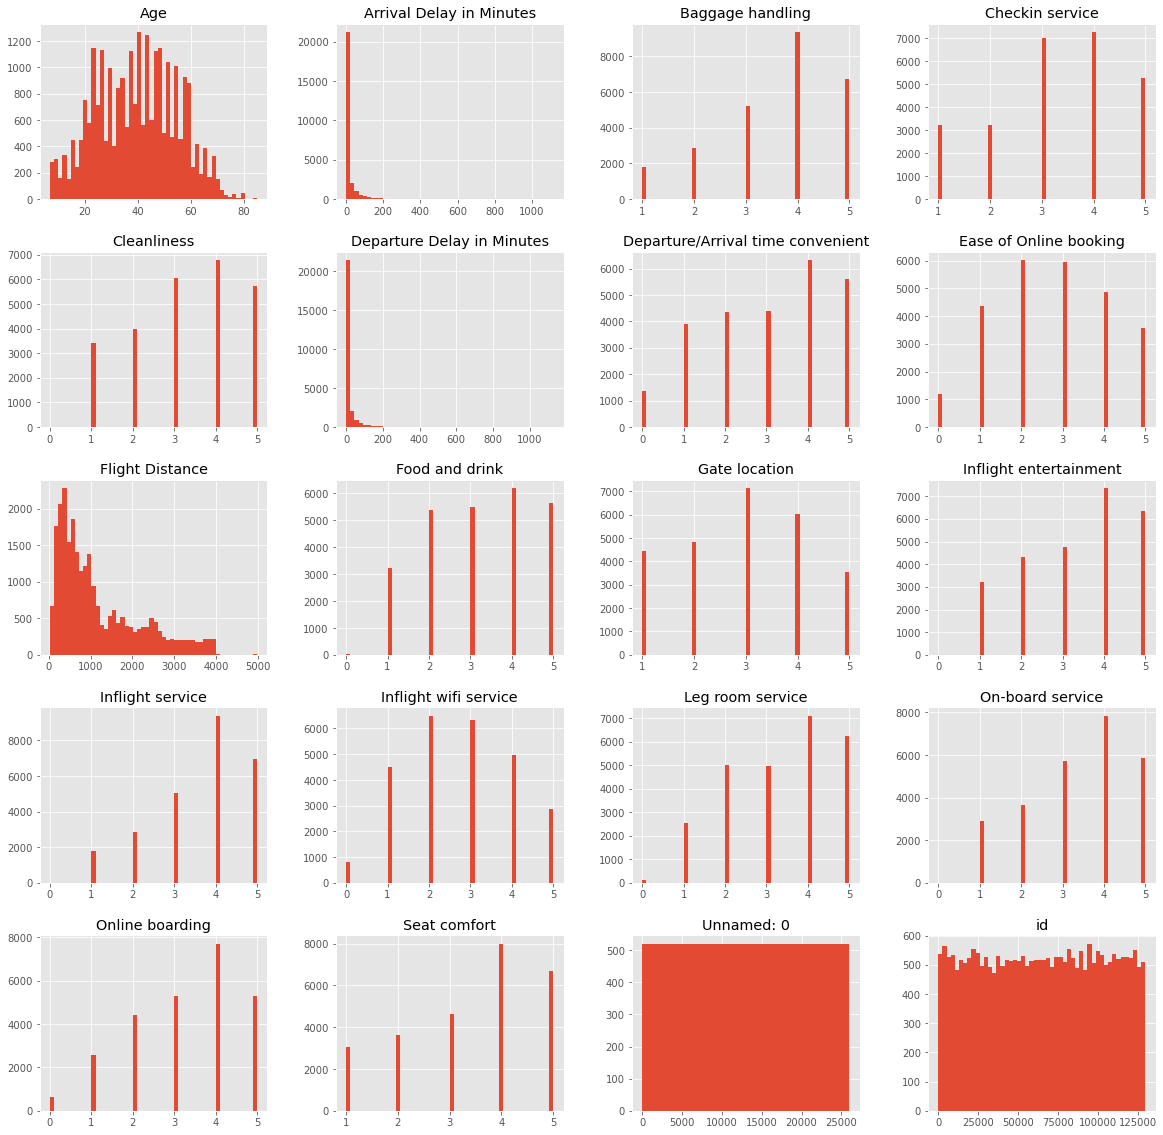

In [378]:
# First-hand look at the numerical features and their average grades:
df.hist(bins=50, figsize=(20,20))
plt.show()

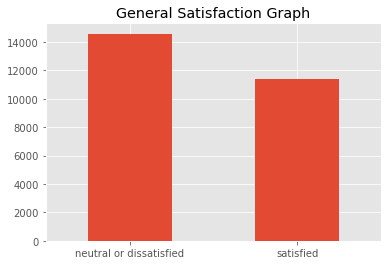

In [381]:
# Let's see if there are more satisfied or dissatisfied passangers.
general_satisfaction = df['satisfaction'].value_counts().plot(kind='bar', rot=0,
title='General Satisfaction Graph')

Conclusion: There are more neutral/dissatisfied than satisfied passangers.

## 2) Cleaning the Data
In order to clean the data, I will be doing the following: <br>
$\bullet$ Get rid of the unnecessary features. <br>
$\bullet$ Change the 'object' type features into 'int' type. <br>
$\bullet$ Checking and fixing missing (null) data. <br>

### Get rid of the unnecessary features
The 'id' and 'Unnamed :0' featues are unnecessary so I will remove them from the dataset.

In [382]:
#Using 'Drop' I will remove these columns:
df = df.drop('Unnamed: 0', axis=1)
df = df.drop('id', axis=1)

In [383]:
#Lets show the updated dataset:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [384]:
#Shape of the updated dataset:
df.shape

(25976, 23)

In [385]:
# Information about the updated dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  object 
 1   Customer Type                      25976 non-null  object 
 2   Age                                25976 non-null  int64  
 3   Type of Travel                     25976 non-null  object 
 4   Class                              25976 non-null  object 
 5   Flight Distance                    25976 non-null  int64  
 6   Inflight wifi service              25976 non-null  int64  
 7   Departure/Arrival time convenient  25976 non-null  int64  
 8   Ease of Online booking             25976 non-null  int64  
 9   Gate location                      25976 non-null  int64  
 10  Food and drink                     25976 non-null  int64  
 11  Online boarding                    25976 non-null  int

#### Info Summary:
$ \bullet int64(18):$ <br>
id<br>
Age<br>
Flight Distance <br>
Inflight wifi servic,<br> 
Departure/Arrival time convenient <br>
Ease of Online booking <br>
Gate location<br>
Food and drink<br>
Online boarding<br>
Seat comfort<br>
Inflight entertainment<br>
On-board service<br>
Leg room service<br>
Baggage handling<br>
Checkin service<br>
Inflight service<br>
Cleanliness<br>
Departure Delay in Minutes<br>

$\bullet object(5):$ <br>
Gender<br>
Customer Type<br>
Type of Travel Class<br> 
satisfaction<br>

$\bullet float64(1):$ <br>
Arrival Delay in Minutes<br>

#### $\bullet$ I will replace the spaces in the column names with underscore, to make the data easier to use:

In [386]:
df.columns = [string.replace(' ', '_') for string in df_Clean.columns]

### Changing the 'object' type features into 'int' type
I will change features to type int in order to allow the data to be analized better and easier.

In [387]:
# Feature: Satisfaction:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [388]:
# Feature: Gender:
df['Gender'].replace({'Male': 0, 'Female': 1},inplace = True)

In [389]:
# Feature: Customer_Type:
df['Customer_Type'].replace({'disloyal Customer': 0, 'Loyal Customer': 1},inplace = True)

In [390]:
# Feature: Type_of_Travel:
df['Type_of_Travel'].replace({'Personal Travel': 0, 'Business travel': 1},inplace = True)

In [391]:
# Feature: Class:
df['Class'].replace({'Eco': 0, 'Eco Plus': 1, 'Business': 2},inplace = True)

In [392]:
df.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,1,1,52,1,0,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,2,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,0,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,2,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,0,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [393]:
#Now if we check the dataset types, we can see that they are all numericle.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer_Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Type_of_Travel                     25976 non-null  int64  
 4   Class                              25976 non-null  int64  
 5   Flight_Distance                    25976 non-null  int64  
 6   Inflight_wifi_service              25976 non-null  int64  
 7   Departure/Arrival_time_convenient  25976 non-null  int64  
 8   Ease_of_Online_booking             25976 non-null  int64  
 9   Gate_location                      25976 non-null  int64  
 10  Food_and_drink                     25976 non-null  int64  
 11  Online_boarding                    25976 non-null  int

### Checking and fixing missing(null) data

In [394]:
# First we check if and where the null data is.
df.isnull().sum()

Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             83
satisfaction                          0
dtype: int64

$\bullet$ There are only 83 accounts of missng data and in only 1 feature(Arrivale_Delay_in_Minutes).<br>
$\bullet$ Since it's a very small amount of data, I'll fill the null frames with the mean of the feature.


In [395]:
# Filling missing values in 'Arrival_Delay_in_Minutes' with the mean.
df['Arrival_Delay_in_Minutes'].fillna(df_Clean['Arrival_Delay_in_Minutes'].mean(), inplace=True)

In [396]:
# Checking the updated data.
df.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

## 2) Visualization
Here I will be showing some visual graphs in order to understand the data better and to find interesting conclusions.

#### Let's have a look at the correltion heatmap to see which features have the most correlation with satisfaction.

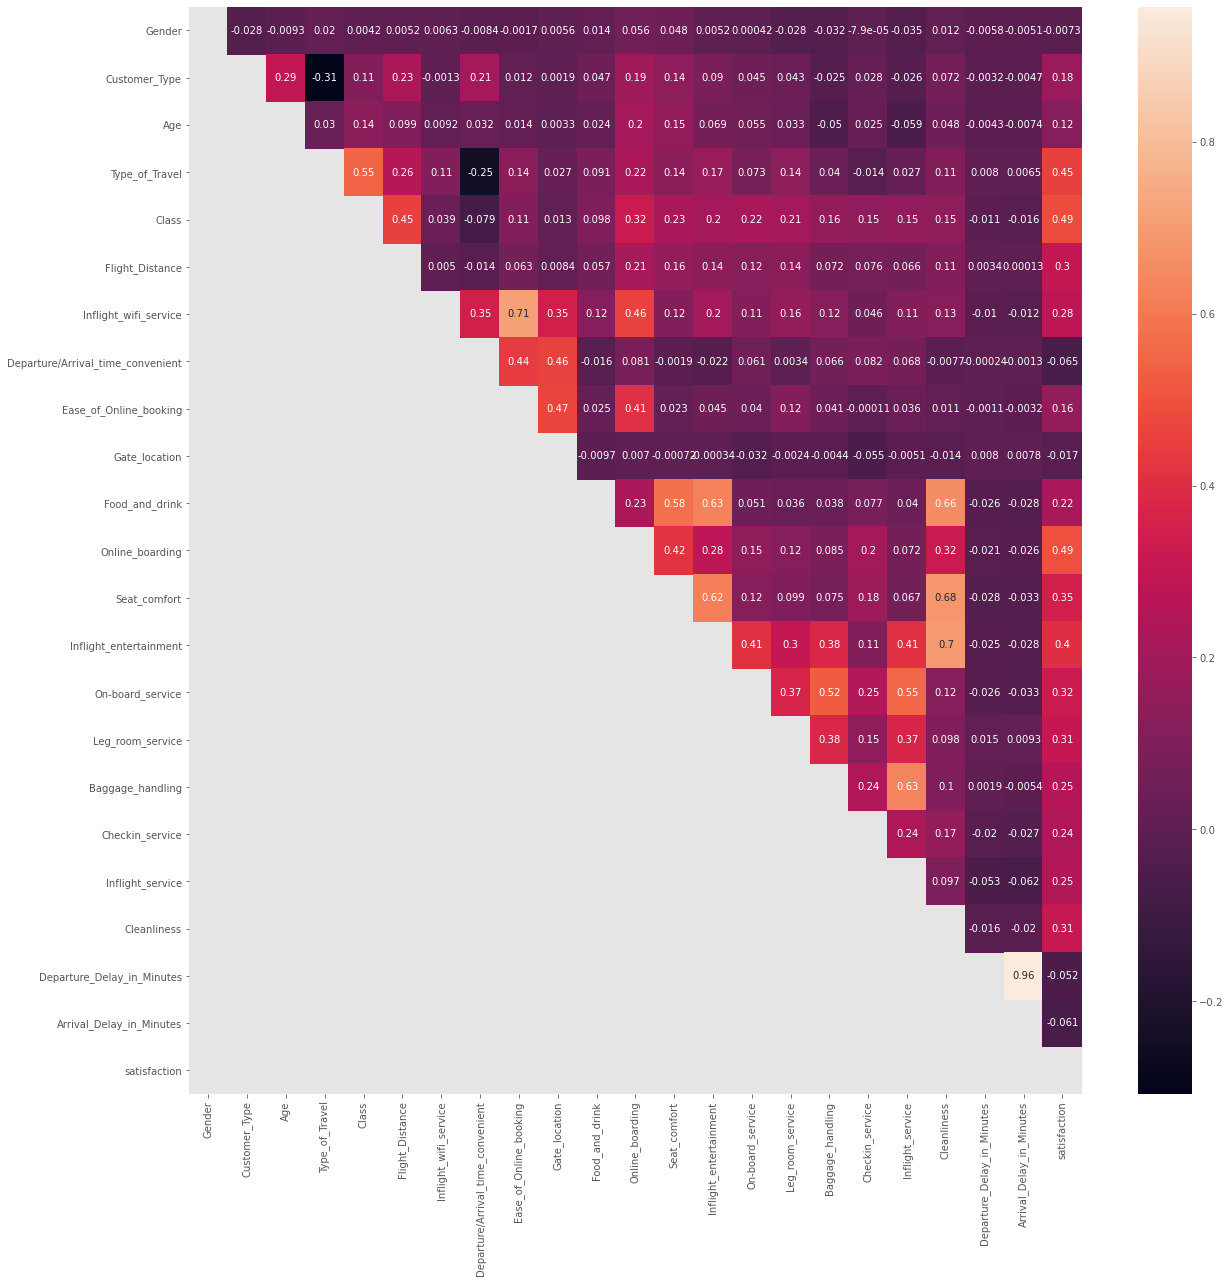

In [397]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, mask=np.tril(df.corr()))

#### Let's analize different passanger features and see the ratio to satisfaction.

#### $\bullet$  Gender vs Satisfaction

In [186]:
df[["Gender","satisfaction"]].groupby(["Gender"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

# Male = 0
#female = 1

,Gender,satisfaction
0,0,0.442674
1,1,0.435393


#### Observation:<br>
$\bullet$ We can see that the type of gender is balanced and has little effect on satisfaction.

#### $\bullet$ Age vs Satisfaction

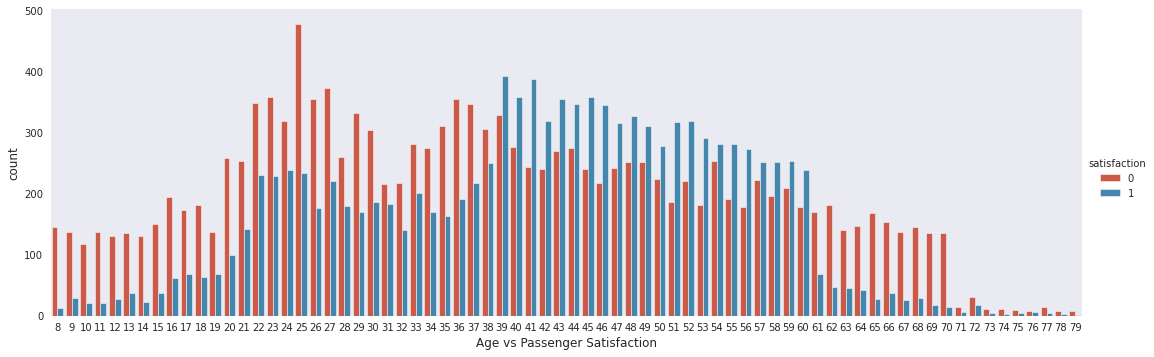

In [187]:
with sns.axes_style('dark'): #background color
    g = sns.catplot("Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(8, 80))
    g.set_xlabels('Age vs Passenger Satisfaction')
   
# satisfied = 1
# unsatisfied = 0

In [188]:
# Most Satisfied
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False).head(10)

,Age,satisfaction
44,51,0.630219
46,53,0.617336
34,41,0.614534
39,46,0.613879
49,56,0.606195
38,45,0.598333
48,55,0.594080
45,52,0.590741
53,60,0.571770
35,42,0.569643


In [189]:
# Least Satisfied
df[["Age","satisfaction"]].groupby(["Age"],as_index=False).mean().sort_values(by="satisfaction",ascending=False).tail(10)

,Age,satisfaction
61,68,0.171429
60,67,0.159509
3,10,0.151079
7,14,0.143791
58,65,0.142857
4,11,0.132075
62,69,0.117647
63,70,0.093960
1,8,0.076433
0,7,0.073171


#### Observations: <br>
$\bullet$ The more likely satisfied passengers are in the age group of 40's and 50's.<br>
$\bullet$The less-satisfied passengers are from the youth and elderly groups. <br>
$\bullet$ This is probably because the youth don't really understand the meaning of satisfaction, while the olderly group require the highest standard in order to be satisfied.

#### $\bullet$ Type of Travel vs Satisfaction

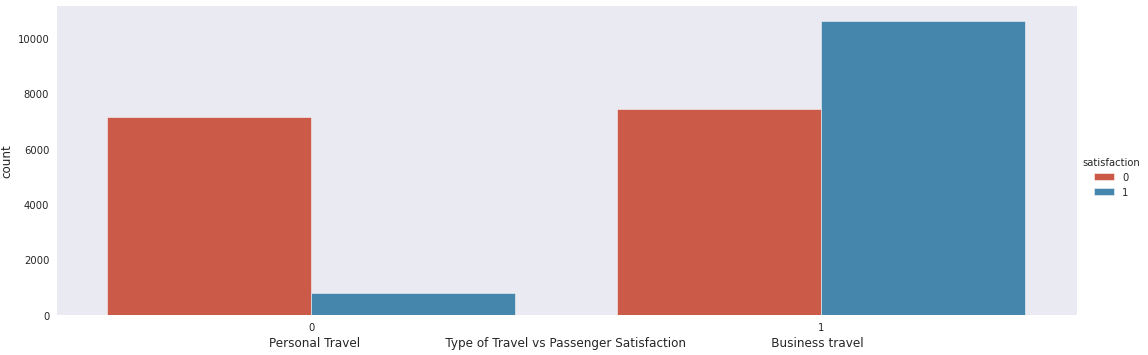

In [404]:
with sns.axes_style('dark'):
    g = sns.catplot("Type_of_Travel", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 2))
    g.set_xlabels('Personal Travel                      Type of Travel vs Passenger Satisfaction                      Business travel')
   
# satisfied = 1
# unsatisfied = 0

# Personal Travel: 0
# Business travel: 1

In [191]:
df[["Type_of_Travel","satisfaction"]].groupby(["Type_of_Travel"],as_index=False).mean().sort_values(by="satisfaction",ascending=False).tail(10)

,Type_of_Travel,satisfaction
1,1,0.588203
0,0,0.099899


#### Observation:<br>
$\bullet$ There are a lot more buisness passengers than personal.<br>
$\bullet$ Buisness passengers are more satisfied then personal fliers. As a company, I would want to keep the buisness passengers satisfied as they are a much more loyal group.

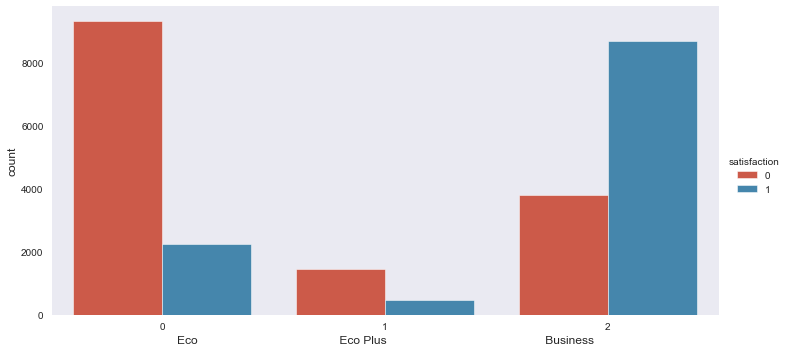

In [370]:
with sns.axes_style('dark'):
    g = sns.catplot("Class", data=df, aspect=2.0, kind='count', hue='satisfaction', order=range(0, 3),)
    g.set_xlabels('Class vs Passenger Satisfaction')
    plt.xlabel("Eco                                          Eco Plus                                               Business")
    plt.show()
# satisfied: 1
# unsatisfied: 0

In [193]:
df[["Class","satisfaction"]].groupby(["Class"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Class,satisfaction
2,2,0.695158
1,1,0.247783
0,0,0.193878


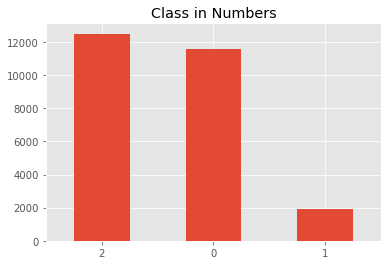

In [358]:
df['Class'].value_counts().plot(kind='bar', rot=0, title='Class in Numbers')

# Eco: 0
# Eco Plus: 1
# Business: 2

#### Observations:<br> 
$\bullet$ Buisness class passengers are a lot more satisfied than the Eco and Eco Plus passengers.<br>
$\bullet$ About 70% of the buisness class passengers are satisfied, which to me is high.<br>
$\bullet$ We can learn from here that the extra services and privileges that come with buisness class are worth the price.<br>
$\bullet$ People travel more via Eco than Eco Plus, maybe the price of Eco Plus is not worth it. Maybe it's just because nomal airplanes hold less Eco Plus seats than Eco.

#### $\bullet$ Customer Type vs Satisfaction

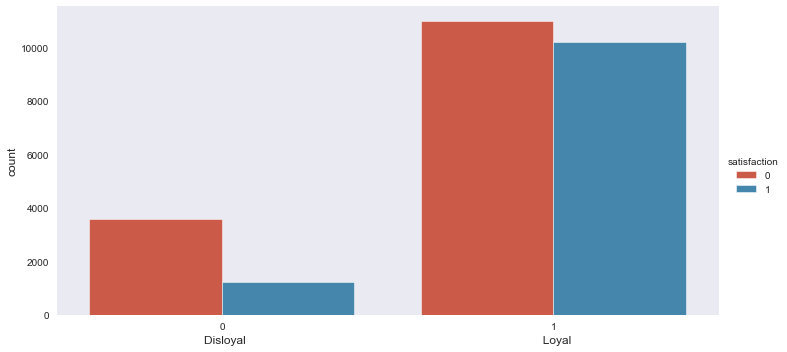

In [371]:
with sns.axes_style('dark'):
    g = sns.catplot("Customer_Type", data=df, aspect=2.0, kind='count', hue='satisfaction', order=range(0, 2),)
    g.set_xlabels('Customer Type vs Passenger Satisfaction')
    plt.xlabel("Disloyal                                                                                        Loyal")
    plt.show()
# satisfied: 1
# unsatisfied: 0

#### Observation:<br>
$\bullet$ Here we can see that the satisfaction percentage is about balanced between loyal passengers.<br>
$\bullet$ It is understandable why disloyal passengers are more unsatisfied. <br>
$\bullet$ As a company, it is probably more important to put an emphasis on the loyal passengers as they are greater in numbers than the disloyal. I would want to fix the loyal passengers graph.

#### Let's now analize different service features and see the corralationo to satisfaction.

#### $\bullet$ Online Boarding vs Satisfaction

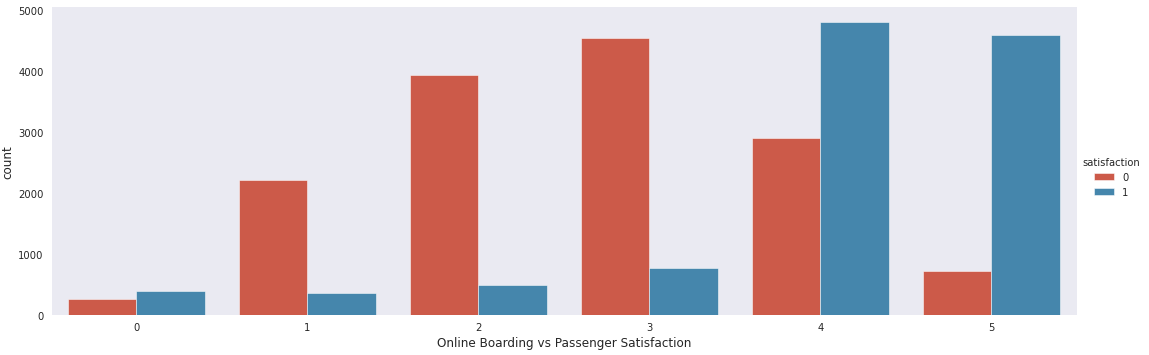

In [196]:
with sns.axes_style('dark'):
    g = sns.catplot("Online_boarding", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Online Boarding vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

In [197]:
df[["Online_boarding","satisfaction"]].groupby(["Online_boarding"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Online_boarding,satisfaction
5,5,0.865838
4,4,0.622891
0,0,0.595092
3,3,0.145492
1,1,0.137797
2,2,0.111312


#### Observation: <br>
$\bullet$ There is a connection to a grade 3 and under to unsatisfied passengers, and over 3 to satisfied passengers.

#### $\bullet$ Inflight Entertainment vs Satisfaction

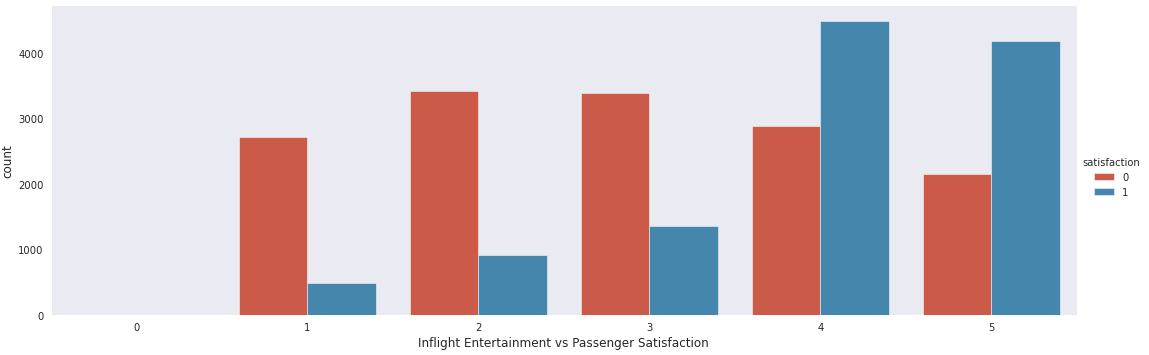

In [198]:
with sns.axes_style('dark'):
    g = sns.catplot("Inflight_entertainment", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Inflight Entertainment vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

In [199]:
df[["Inflight_entertainment","satisfaction"]].groupby(["Inflight_entertainment"],as_index=False).mean().sort_values(by="satisfaction",ascending=False)

,Inflight_entertainment,satisfaction
5,5,0.659296
4,4,0.608578
3,3,0.285564
2,2,0.210113
1,1,0.150141
0,0,0.000000


#### $\bullet$ Food and Drink vs Satisfaction

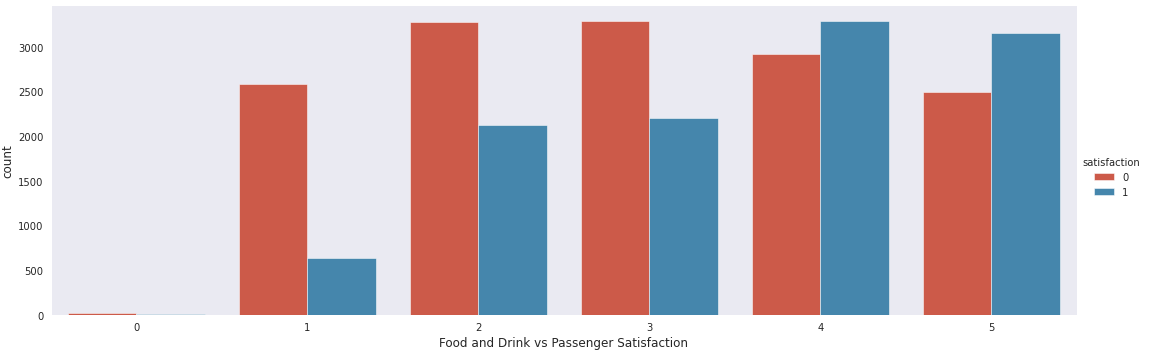

In [200]:
with sns.axes_style('dark'):
    g = sns.catplot("Food_and_drink", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Food and Drink vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### Conclusion: <br>
$\bullet$ We can see that the online boarding, food and drinks, and inflight entertainment features raise the satisfaction grade.<br>
$\bullet$ Passengers probably like to feel that they are flying with a company that is easy and up to date technology wise and has the best service.<br>
$\bullet$ It is worth investing in the extra perks in order to raise the satisfaction of passengers.

#### Finally let's analize different Aircraft Specifications features and see the ratio to satisfaction.


#### $\bullet$ Seat and Comfort vs Satisfaction

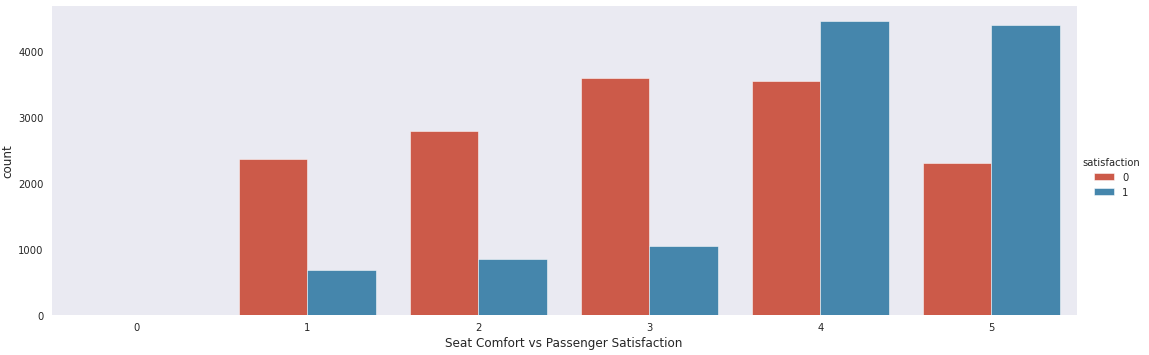

In [348]:
with sns.axes_style('dark'):
    g = sns.catplot("Seat_comfort", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Seat Comfort vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### $\bullet$ Baggage Handling vs Satisfaction

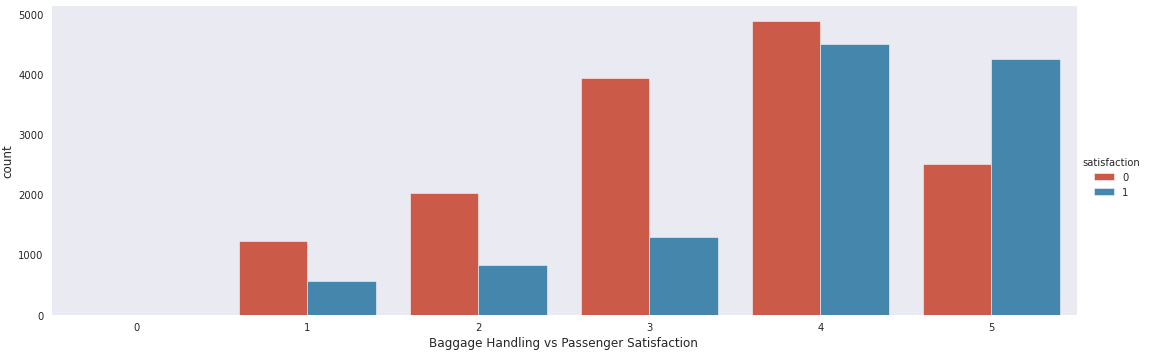

In [202]:
with sns.axes_style('dark'):
    g = sns.catplot("Baggage_handling", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Baggage Handling vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### $\bullet$ Cleanliness vs Satisfaction

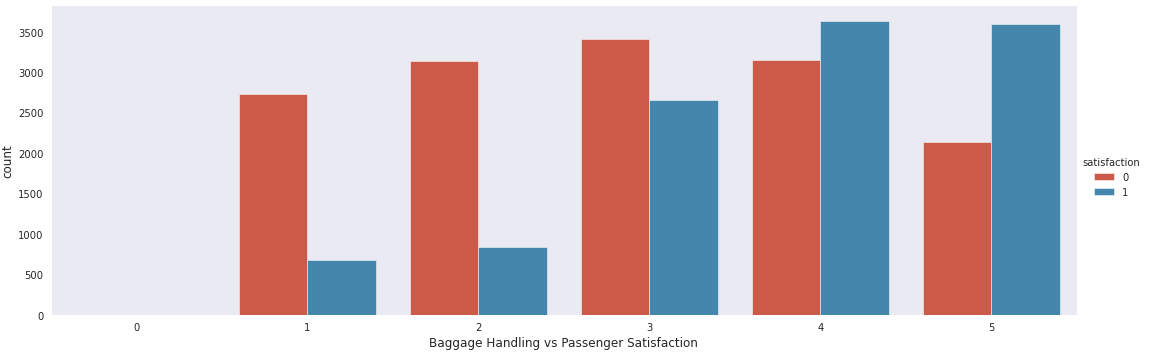

In [203]:
with sns.axes_style('dark'):
    g = sns.catplot("Cleanliness", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(0, 6))
    g.set_xlabels('Baggage Handling vs Passenger Satisfaction')
# satisfied: 1
# unsatisfied: 0

#### Observation:<br>
$\bullet$ We can see that the Aircraft Specifications have a linear effect on satisfaction. 

## 4) Machine learning Models
### $\bullet$ Dummy Classifier
### $\bullet$ KNN
### $\bullet$ Logistic Regression


#### First let's check the score using the dummies classifier.

In [405]:
#importing dummies data set
from sklearn.dummy import DummyClassifier

In [406]:
Y = df['satisfaction'].values
X = df.drop(columns = ['satisfaction'])
dummy_clf = DummyClassifier(strategy="most_frequent") 
# "most_frequent" - predicts the most frequent class label in the training data.
dummy_clf.fit(X,Y)
dummy_clf.predict(X)
print('The dummy score is:',dummy_clf.score(X,Y))

The dummy score is: 0.5610178626424391


#### Let's split the test set to be 20% and the train set to be 80%.

In [407]:
#importing train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20780, 22)
(20780,)
(5196, 22)
(5196,)


### $\bullet$ KNN

In [408]:
from sklearn.neighbors import KNeighborsClassifier

Let's check what the accuracy score is when we set the nearest neighbor to be 5.

In [409]:
knn = KNeighborsClassifier(n_neighbors = 5) # We'll use the default number of neighbors.
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print('K=5 accuracy score: ',knn.score(x_test,y_test))

K=5 accuracy score:  0.7070823710546574


#### Let's see if I can improve the accuracy score. Now I'll change the value of K between the range of 1-145 and see which K returns the best score.

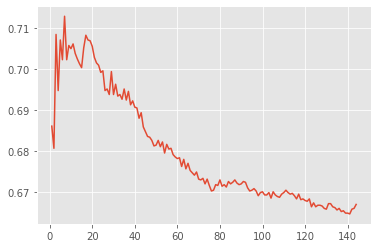

In [410]:
accuracy_Arr = []
for i in range(1,145):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        accuracy_Arr.append(knn.score(x_test, y_test))
plt.plot(range(1,145),accuracy_Arr)
plt.show()

As we can see, when k is between 1 and 20, we get the best score. Let's have a closer look.

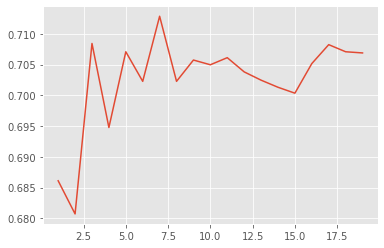

In [411]:
accuracy_Arr = []
for i in range(1,20):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        accuracy_Arr.append(knn.score(x_test, y_test))
plt.plot(range(1,20),accuracy_Arr)
plt.show()

Let's zoom in once more.

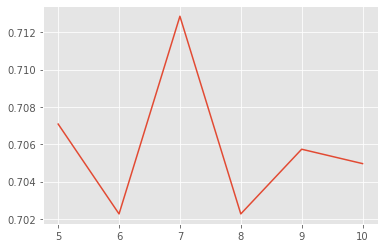

In [412]:
accuracy_Arr = []
for i in range(5,11):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        accuracy_Arr.append(knn.score(x_test, y_test))
plt.plot(range(5,11),accuracy_Arr)
plt.show()

In [413]:
knn = KNeighborsClassifier(n_neighbors = 7) 
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print('K=7 accuracy score: ',knn.score(x_test,y_test))

K=7 accuracy score:  0.7128560431100847


Conclusion: When we K=7 we get the highest score.

#### Let's now evaluate our model accuracy with the Conusion Matrix function.

In [414]:
# Importing the Confusion Matrix function:
from sklearn.metrics import plot_confusion_matrix

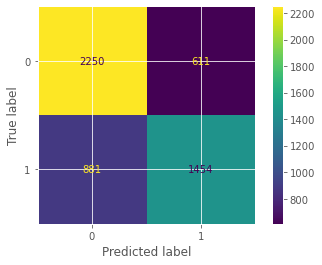

In [415]:
plot_confusion_matrix(knn , x_test , y_test)

#### Observation:<br>
$Negative\space Class (dissatisfied\space passengers)$<br>
$\bullet$ 2,250 passengers were correctly classified as dissatisfied.(True-Negative)<br>
$\bullet$ 611 passengers were wrongly classified as satisfied.(False-Negative)<br>
$Positive\space Class (satisfied\space passengers)$<br>
$\bullet$ 1,454 passengers were correctly classified as satisfied.(True-Positive)<br>
$\bullet$ 881 passengers were wrongly classified as dissatisfied.(False-Positive)<br>

#### We have 1,492 out of 5,196 wrong acounts.

Let's have a look at the Knn report:

In [416]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, classification_report
target_names = ['unsatisfied', 'satisfied']
report = classification_report(y_test, knn.predict(x_test), target_names=target_names)
print(report)

              precision    recall  f1-score   support

 unsatisfied       0.72      0.79      0.75      2861
   satisfied       0.70      0.62      0.66      2335

    accuracy                           0.71      5196
   macro avg       0.71      0.70      0.71      5196
weighted avg       0.71      0.71      0.71      5196



#### Explanation:<br>
Precision – What percent of the predictions were correct? In other words, what percent did the True-Positive score.<br>
Recall – What percent of the positive cases did we find out to be False-Negative? <br>
F1 score – What percent of positive predictions were correct? <br>

### $\bullet$ Logistic Regression

In [417]:
# importing logistic regression
from sklearn.linear_model import LogisticRegression

It is better to scale the data in Logistic Regression. 

In [418]:
from sklearn.preprocessing import MinMaxScaler
scal_df = df
scaler = MinMaxScaler()
scaled = scaler.fit_transform(scal_df)
scaled.shape

(25976, 23)

In [421]:
df_sc = pd.DataFrame({'Gender': scaled[:, 0], 'Customer_Type': scaled[:, 1], 'Age': scaled[:, 2], 'Type_of_Trave': scaled[:, 3], 'Class': scaled[:, 4], 'Flight_Distance': scaled[:,5], 'Inflight_wifi_service': scaled[:,6], 'Departure/Arrival_time_convenient': scaled[:, 7], 'Ease_of_Online_booking': scaled[:,8], 'Gate_location': scaled[:, 9], 'Food_and_drink': scaled[:, 10], 'Online_boarding': scaled[:, 11], 'Seat_comfort': scaled[:,12], 'Inflight_entertainment': scaled[:,13], 'On-board_service': scaled[:,14], 'Leg_room_service': scaled[:,15], 'Baggage_handling': scaled[:, 16], 'Checkin_service': scaled[:, 17], 'Inflight_service': scaled[:,18], 'Cleanliness': scaled[:,19], ' Departure_Delay_in_Minute': scaled[:,20], 'Arrival_Delay_in_Minutes': scaled[:,21], 'satisfaction': scaled[:,22]})
df_sc.head()

,Gender,Customer_Type,Age,Type_of_Trave,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minute,Arrival_Delay_in_Minutes,satisfaction
0,1.0,1.0,0.576923,1.0,0.0,0.026050,1.0,0.8,0.6,0.75,...,1.0,1.0,1.0,1.00,0.25,1.0,1.0,0.044326,0.039462,1.0
1,1.0,1.0,0.371795,1.0,1.0,0.571890,0.2,0.2,0.6,0.00,...,0.8,0.8,0.8,0.75,0.50,0.8,1.0,0.000000,0.000000,1.0
2,0.0,0.0,0.166667,1.0,0.0,0.032512,0.4,0.0,0.4,0.75,...,0.4,0.8,0.2,0.50,0.25,0.4,0.4,0.000000,0.000000,0.0
3,0.0,1.0,0.474359,1.0,1.0,0.675687,0.0,0.0,0.0,0.25,...,0.2,0.2,0.2,0.00,0.50,0.2,0.8,0.000000,0.005381,1.0
4,1.0,1.0,0.538462,1.0,0.0,0.232431,0.4,0.6,0.8,0.50,...,0.4,0.4,0.4,0.25,0.75,0.4,0.8,0.000000,0.017937,1.0


$\bullet$ Now we see that all of the data (including the training and test) is scaled between 0 and 1.

#### Now lets split the scaled data.

In [422]:
x_sc = df_sc.drop(['satisfaction'], axis = 1)
y_sc = df_sc['satisfaction']
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y_sc, test_size=0.2, random_state=0)
print('x_train_sc:',x_train_sc.shape)
print('y_train_sc:',y_train_sc.shape)
print('x_test_sc:',x_test_sc.shape)
print('y_test_sc:',y_test_sc.shape)

x_train_sc: (20780, 22)
y_train_sc: (20780,)
x_test_sc: (5196, 22)
y_test_sc: (5196,)


In [423]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000)
result = LR.fit(x_train_sc, y_train_sc)

In [424]:
from sklearn import metrics
prediction_test = LR.predict(x_test_sc)
print ("Accuracy:",metrics.accuracy_score(y_test_sc, prediction_test))

Accuracy: 0.8623941493456505


#### Let's now evaluate our model accuracy with the Conusion Matrix function.

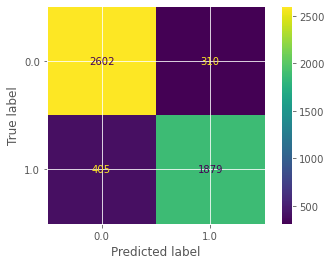

In [427]:
plot_confusion_matrix(LR , x_test_sc , y_test_sc)

#### Observation:<br>
$Negative\space Class (dissatisfied\space passengers)$<br>
$\bullet$ 2,602 passengers were correctly classified as dissatisfied.(True-Negative)<br>
$\bullet$ 310 passengers were wrongly classified as satisfied.(False-Negative)<br>
$Positive\space Class (satisfied\space passengers)$<br>
$\bullet$ 1,879 passengers were correctly classified as satisfied.(True-Positive)<br>
$\bullet$ 415 passengers were wrongly classified as dissatisfied.(False-Positive)<br>

#### We have 725 out of 5,196 wrong acounts.

Let's have a look at the LR report:

In [429]:
target_names = ['unsatisfied', 'satisfied']
report = classification_report(y_test_sc, LR.predict(x_test_sc), target_names=target_names)
print(report)

              precision    recall  f1-score   support

 unsatisfied       0.87      0.89      0.88      2912
   satisfied       0.86      0.82      0.84      2284

    accuracy                           0.86      5196
   macro avg       0.86      0.86      0.86      5196
weighted avg       0.86      0.86      0.86      5196



### Cross Validation using k-fold
1) Randomly split the entire dataset into k-folds <br>
2) For each k-fold in the dataset, build the model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold <br>
3) Repeat until each of the k-folds has served as the test set <br>
4) The average of the k recorded errors is called the cross-validation error and will serve as the performance metric for the model <br>


In [430]:
#importing 
from sklearn.model_selection import  cross_val_score

#### $\bullet Knn$

In [431]:
knnCV = cross_val_score(knn, x_train, y_train, cv=10)
print(knnCV)
knnCV.mean()

[0.69923003 0.6852743  0.69826756 0.7107796  0.6987488  0.70067372
 0.68719923 0.69538017 0.72184793 0.67661213]


0.6974013474494708

$\bullet Logistic\space Regression$

In [432]:
LRCV = cross_val_score(LR, x_train_sc, y_train_sc, cv=10)
print(LRCV)
LRCV.mean()

[0.87969201 0.87872955 0.86669875 0.87776708 0.86862368 0.87728585
 0.8840231  0.86333013 0.86236766 0.86717998]


0.8725697786333011

## Conclusion

1) I started by importing and cleaning the data. <br>
2) I removed the noisy data and the changed the null areas. <br>
3) Using visual plots i was able to recognize the connection between different features according to satisfaction.<br>
4) I used two different models, Knn and Logistic Regression.<br>
5) After reviewing the outcomes for the models, I conclude that the Logistic Regression is the optimal one for my data. It recieved a better f1-score and using Cross-Validation, it recieved a higher score.
6) The final score according to the Logistic Regression model is about 87%.